### 2. 데이터 탐색

In [3]:
!pip install google-cloud-bigquery
!pip install db-dtypes
!pip install plotly
!pip install nbformat
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",999)
warnings.filterwarnings("ignore")

In [5]:
# 파이썬 구글 빅쿼리 연동 코드
# json 파일

key_path = glob.glob("./*.json")[0]
credentials = service_account.Credentials.from_service_account_file("/mnt/c/Users/82105/Desktop/이커머스 데이터 분석/e-commerce_data_analysis/data-analysis-with-olist-e5fb88210657.json")
client = bigquery.Client(credentials = credentials, 
                         project = credentials.project_id)

In [7]:
df_orders = pd.read_csv("./data/olist_orders_dataset.csv")
df_order_payments = pd.read_csv("./data/olist_order_payments_dataset.csv")
df_order_items = pd.read_csv("./data/olist_order_items_dataset.csv")
df_products = pd.read_csv("./data/olist_products_dataset.csv")
df_sellers = pd.read_csv("./data/olist_sellers_dataset.csv")
df_customers = pd.read_csv("./data/olist_customers_dataset.csv")

In [11]:
display("orders", df_orders.head(1), "order_paymenrs",df_order_payments.head(1), "order_items", df_order_items.head(1), "products", df_products.head(1), "sellers", df_sellers.head(1), "customers",  df_customers.head(1))

'orders'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


'order_paymenrs'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


'order_items'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


'products'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


'sellers'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


'customers'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


### 2-1 orders 테이블

In [98]:
def countplot(data,column):
    ax = sns.countplot(x = data[column], data=data, order = data[column].value_counts().index)
    plt.xticks(rotation = 45)
    for i, line in enumerate(ax.patches):
        ax.text(line.get_x() + line.get_width() / 2, line.get_height() + 1000,"{}".format(data[column].value_counts().values[i]),ha="center",size=6)

In [21]:
print("order 테이블 행 개수: {}".format(len(df_orders)))
print("주문 아이디 고유 개수: {}".format(df_orders["order_id"].nunique()))
print("고객 아이디 개수: {}".format(df_orders["customer_id"].nunique()))

order 테이블 행 개수: 99441
주문 아이디 고유 개수: 99441
고객 아이디 개수: 99441


- 주문 테이블의 전체 행은 99441개
- 주문 아이디 및 고객 아이디 모두 99441개
- 같은 고객이 여러개의 주문을 하지는 않음

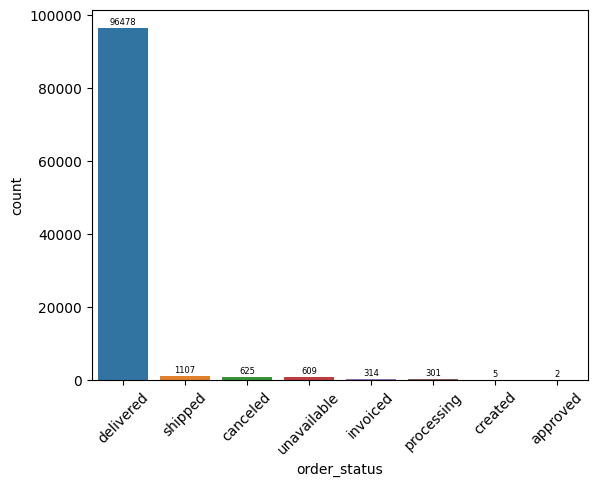

In [60]:
countplot(df_orders,"order_status")

- 배송 상태 컬럼은 8개의 카테고리를 가지고 있습니다.
- 배송이 완료인 상태가 가장 많은 것을 볼 수가 있습니다.

In [99]:
df_delivered = df_orders.loc[df_orders["order_status"] == "delivered",]
print("배송 완료 행 개수: {}".format(len(df_delivered)),"\n")
print("delivered 결측치 개수")
df_orders.loc[df_orders["order_status"] == "delivered",].isnull().sum()

배송 완료 행 개수: 96478 

delivered 결측치 개수


order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [92]:
print("배송 완료 행 개수: {}".format(len(df_orders.loc[df_orders["order_status"] == "shipped",])),"\n")
print("shipped 결측치 개수:")
df_orders.loc[df_orders["order_status"] == "shipped",].isnull().sum()

배송 완료 행 개수: 1107 

shipped 결측치 개수:


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64

In [93]:
print("배송 완료 행 개수: {}".format(len(df_orders.loc[df_orders["order_status"] == "invoiced",])),"\n")
print("invoiced 결측치 개수:")
df_orders.loc[df_orders["order_status"] == "invoiced",].isnull().sum()

배송 완료 행 개수: 314 

invoiced 결측치 개수:


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64

In [94]:
print("배송 완료 행 개수: {}".format(len(df_orders.loc[df_orders["order_status"] == "approved",])),"\n")
print("approved 결측치 개수:")
df_orders.loc[df_orders["order_status"] == "approved",].isnull().sum()

배송 완료 행 개수: 2 

approved 결측치 개수:


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    2
order_estimated_delivery_date    0
dtype: int64

In [95]:
print("배송 완료 행 개수: {}".format(len(df_orders.loc[df_orders["order_status"] == "processing",])),"\n")
print("processing 결측치 개수:")
df_orders.loc[df_orders["order_status"] == "processing",].isnull().sum()

배송 완료 행 개수: 301 

processing 결측치 개수:


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64

In [96]:
print("배송 완료 행 개수: {}".format(len(df_orders.loc[df_orders["order_status"] == "unavailable",])),"\n")
print("unavailable 결측치 개수:")
df_orders.loc[df_orders["order_status"] == "unavailable",].isnull().sum()

배송 완료 행 개수: 609 

unavailable 결측치 개수:


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

In [97]:
print("배송 완료 행 개수: {}".format(len(df_orders.loc[df_orders["order_status"] == "canceled",])),"\n")
print("canceled 결측치 개수:")
df_orders.loc[df_orders["order_status"] == "canceled",].isnull().sum()

배송 완료 행 개수: 625 

canceled 결측치 개수:


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64

- 배송이 완료 되었다면 시간과 관련된 컬럼이 결측값을 가져서는 안됩니다. 하지만 결측치가 존재하네요.
- 결측치 값을 한번 살펴보겠습니다.

In [106]:
df_delivered.loc[df_delivered["order_delivered_customer_date"].isnull(),]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


delivered 데이터의 고객에게 도착한 날짜가 결측치인 데이터를 추출했습니다.
아직 고객에게 도착하지 않은 데이터로 배송 중인 데이터라고 생각됩니다. 따라서 order_status가 delivered가 아닌 shipped로 주어져야 맞는 것으로 추측됩니다.

결측치를 분석한 내용을 토대로 정리를 하면 아래와 같을 것으로 보입니다.

* delivered: 배송 완료
* shipped: 결제 완료 및 배송 시작
* invoiced / approved / processing: 결제 완료 및 배송 준비 중
* unavailable: 이용 불가(재고 부족 등으로 판매자 측의 취소)
* canceled: 주문 취소(주문자가 취소한 경우)

### 2-2 order_payments 테이블

In [156]:
print("order_payments 행 개수: {}".format(len(df_order_payments)))
print("주문 아이디 행 개수: {}".format(df_order_payments["order_id"].nunique()))

order_payments 행 개수: 103886
주문 아이디 행 개수: 99440


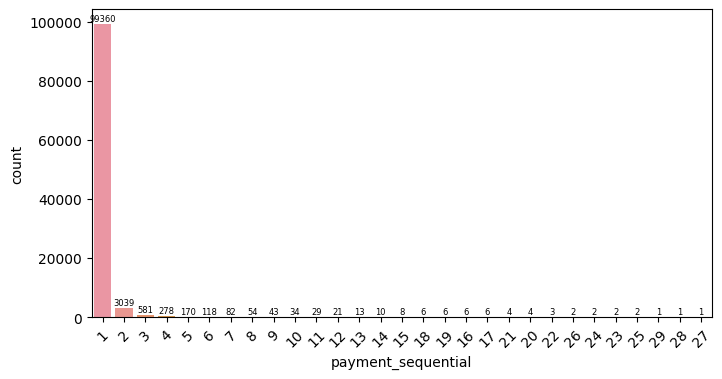

In [157]:
countplot(df_order_payments,"payment_sequential")

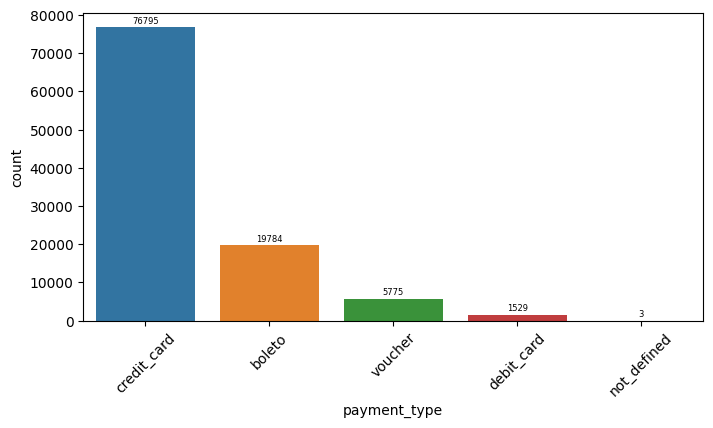

In [158]:
countplot(data=df_order_payments,column="payment_type")

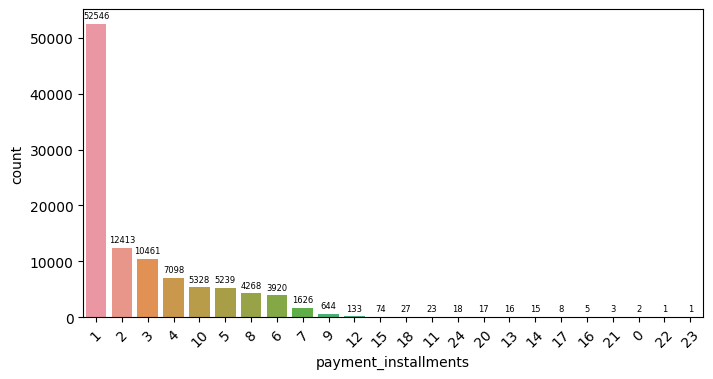

In [159]:
countplot(data=df_order_payments,column="payment_installments")

위 시각화를 통해 확인한 정보

* payment_type은 5개의 종류가 있습니다.
* 신용카드로 결제한 경우가 가장 많습니다.
* 어떤 사람은 한 가지 방법이 아닌 여러 결제 방법을 사용했습니다. (최대 27개의 결제 방식을 사용함. 왜 그랬지..?)
* 일시불로 결제한 주문이 가장 많고, 최대 1년 할부로 결제한 사람들도 있습니다.

### 2-3 order_items 테이블

In [162]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [165]:
print("order_items 행 개수: {}".format(len(df_order_items)))
print("order_id 고유 행 개수: {}".format(df_order_items["order_id"].nunique()))
print("product_id 고유 행 개수: {}".format(df_order_items["product_id"].nunique()))
print("seller_id 고유 행 개수: {}".format(df_order_items["seller_id"].nunique()))

order_items 행 개수: 112650
order_id 고유 행 개수: 98666
product_id 고유 행 개수: 32951
seller_id 고유 행 개수: 3095


In [166]:
df_order_items.loc[df_order_items["order_item_id"] ==2,]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78
76,002c9def9c9b951b1bec6d50753c9891,2,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90
...,...,...,...,...,...,...,...
112580,ffd84ab39cd5e873d8dba24342e65c01,2,fcf50ee5ad1f1a48671052487d2b0bff,0be8ff43f22e456b4e0371b2245e4d01,2017-10-11 19:49:17,24.90,7.78
112604,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,2017-09-07 21:25:40,19.00,15.79
112616,ffecd5a79a0084f6a592288c67e3c298,2,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14


In [167]:
df_order_items.loc[df_order_items["order_id"] == "0008288aa423d2a3f00fcb17cd7d8719"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37


데이터로 확인한 정보

* 중복되는 주문 아이디가 있습니다.
* 중복되는 주문 아이디는 동일한 상품을 여러개 산 경우로 보입니다.
* 이때 product_id, seller_id는 같습니다.

### 2-4 sellers 테이블

In [173]:
print("df_sellers 행 개수: {}".format(len(df_sellers)))

print("seller_city 고유 개수: {}".format(df_sellers["seller_city"].nunique()))

print("seller_state 고유 개수: {}".format(df_sellers["seller_state"].nunique()))

df_sellers 행 개수: 3095
seller_city 고유 개수: 611
seller_state 고유 개수: 23


데이터로 확인한 정보
* 3095명의 판매자가 있습니다.
* 다양한 도시의 판매자가 있습니다.

### 2-5 customers 테이블

In [179]:
print("customers 테이블 행 개수: {}".format(len(df_customers)))
print("customer_id 고유 개수: {}".format(df_customers["customer_id"].nunique()))
print("customer_unique_id 고유 개수: {}".format(df_customers["customer_unique_id"].nunique()))

customers 테이블 행 개수: 99441
customer_id 고유 개수: 99441
customer_unique_id 고유 개수: 96096


데이터로 확인한 정보

* customer_id는 중복된 값을 가지고 있지 않습니다.
* customer_id와 customer_unique_id는 고객이 주문을 하면 주문마다 customer_id가 생성이 되고, 고객을 구분할 수 있는 유일한 아이디는 customer_unique_id 입니다